In [ ]:
import nibabel as nib
import numpy as np

def extract_vectors(nifti_image_path):
    # Load the NIfTI file
    img = nib.load(nifti_image_path)
    data = img.get_fdata()
    
    # Here you need to implement the logic to extract vectors from the data.
    # This example will simply reshape the data into a 2D array (flattening each slice).
    # You might have specific feature extraction or vectorization techniques.
    vectors = data.reshape(data.shape[0], -1)  # Example of flattening each slice
    
    return vectors

def save_vectors_to_txt(vectors, file_path):
    # Save the vectors to a text file
    np.savetxt(file_path, vectors, fmt='%.4f', delimiter=',')
    
# Path to your NIfTI file
nifti_image_path = '/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/NG4118_RCL5_masked.nii.gz'

# Path to the text file where you want to save the vectors
output_file_path = '/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/vectors/NG4118_vectors.txt'

# Extract vectors
vectors = extract_vectors(nifti_image_path)

# Save the vectors to a text file
save_vectors_to_txt(vectors, output_file_path)


In [ ]:
unq = np.unique(vectors)

In [ ]:
unq

In [ ]:
    
# Path to your NIfTI file
nifti_image_path = '/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/NG4127_RCL5.nii.gz'

# Path to the text file where you want to save the vectors
output_file_path = '/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/vectors/NG4127_hp_vectors.txt'

# Extract vectors
vectors = extract_vectors(nifti_image_path)

# Save the vectors to a text file
save_vectors_to_txt(vectors, output_file_path)

In [1]:
import openai


# OpenAI API key setup
openai.api_key = ''

def generate_healthcare_support_text(topic):
    try:
        # Interaction with the language model
        response = openai.Completion.create(
            engine="text-davinci-003",  # Specify the model you are using
            prompt=f"Write a detailed explanation about {topic} in healthcare.",
            max_tokens=1024  # Adjust based on how detailed you want the response to be
        )
        return response.choices[0].text.strip()
    except Exception as e:
        return f"An error occurred: {e}"

def main():
    # List of healthcare topics
    topics = [
        "Importance of vaccination",
        "Managing diabetes with diet and exercise",
        "Preventive measures for heart disease",
        "Benefits of regular health check-ups"
    ]

    # File to save the generated content
    with open("data/healthcare_support.txt", "w") as file:
        for topic in topics:
            content = generate_healthcare_support_text(topic)
            file.write(f"Topic: {topic}\n")
            file.write(content + "\n\n")

if __name__ == "__main__":
    main()


In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the NIfTI file
nifti_path = "/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/NG4120_RCL5_0000.nii.gz"
img = nib.load(nifti_path)
data = img.get_fdata()

# Adjusted function to display a slice and its histogram
def display_slice_and_histogram(slice_no):
    # Setup the figure and axes for a side-by-side plot: slice and histogram
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    
    # Display the slice
    ax = axes[0,0]
    ax.imshow(data[:, :, slice_no], cmap='tab20', interpolation='nearest')
    ax.axis('off')  # Hide axes ticks
    ax.set_title(f'Slice {slice_no}')
    
    # Display the histogram
    ax = axes[0,1]
    slice_data = data[:, :, slice_no].ravel()
    ax.hist(slice_data, bins=50, color='c', alpha=0.75)
    ax.set_title('Pixel Intensity Distribution')
    ax.grid(True)

    ax = axes[1,0]
    ax.imshow(data[:, slice_no,: ].T, cmap='tab20', interpolation='nearest')
    ax.axis('off')  # Hide axes ticks
    ax.set_title(f'Slice {slice_no}')

    ax = axes[1,1]
    ax.imshow(data[slice_no, :,: ], cmap='tab20', interpolation='nearest')
    ax.axis('off')  # Hide axes ticks
    ax.set_title(f'Slice {slice_no}')
    
    plt.tight_layout()
    plt.show()

def display_slice(slice_no):
    plt.imshow(data[:,:,slice_no], cmap='tab20', interpolation='nearest')  
    plt.title(f"Slice {slice_no}")
    plt.colorbar()
    plt.axis('off')  # Turn off axis
    plt.show()



In [ ]:
# Interactive widget for slice selection
slice_slider = widgets.IntSlider(
    min=0, 
    max=data.shape[2] - 1, 
    step=1, 
    value=data.shape[2] // 2, 
    description='Slice'
)

widgets.interactive(display_slice_and_histogram, slice_no=slice_slider)

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import os

def save_nifti_slices_as_jpg_with_matplotlib(nifti_file_path, output_folder, base_filename='img1200_', cmap='gray'):
    """
    Saves each axial slice of a NIfTI image as a separate JPEG file using Matplotlib.

    Parameters:
    - nifti_file_path: Path to the NIfTI file.
    - output_folder: Directory to save the JPEG files.
    - base_filename: The base filename for the output images.
    - cmap: Color map for Matplotlib visualization.
    """
    # Load the NIfTI file
    nifti_image = nib.load(nifti_file_path)
    # Get the data from the NIfTI file
    image_3d = nifti_image.get_fdata()

    # Check if the output folder exists, create if not
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over each slice along the first dimension (assumed axial)
    for index, slice in enumerate(image_3d):
        # Create a figure and axis
        fig, ax = plt.subplots()
        # Display the image slice
        cax = ax.imshow(image_3d[:,:,index], cmap=cmap, )
        # Remove axis labels and ticks
        ax.axis('off')
        # Adjust the color range and aspect ratio
        cax.set_clim(slice.min(), slice.max())

        # Format the filename with the slice index, padded with zeros
        filename = os.path.join(output_folder, f'{base_filename}{index:04d}.jpg')
        # Save the image
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)
        plt.close(fig)
        # print(f'Saved {filename}')



In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import os

def save_nifti_slices_as_jpg_with_matplotlib(nifti_file_path, output_folder, base_filename, dataset_type):
    """
    Saves each axial slice of a NIfTI image as a separate JPEG file using Matplotlib.

    Parameters:
    - nifti_file_path: Path to the NIfTI file.
    - output_folder: Directory to save the JPEG files.
    - base_filename: The base filename for the output images.
    - cmap: Color map for Matplotlib visualization.
    """
    # Load the NIfTI file
    nifti_image = nib.load(nifti_file_path)
    # Get the data from the NIfTI file
    image_3d = nifti_image.get_fdata()

    # Check if the output folder exists, create if not
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    random_array = [197, 267, 111, 140, 192, 232, 144, 123, 266, 258, 203, 197, 221,  57,127, 133,  70,  19, 161 ,183]
    # Iterate over each slice along the first dimension (assumed axial)
    for index, slice in enumerate(image_3d):
        # Create a figure and axis
        fig, ax = plt.subplots()
        # Display the image slice
        cax = ax.imshow(image_3d[:,:,index], cmap='gray' )
        # Remove axis labels and ticks
        ax.axis('off')
        # Adjust the color range and aspect ratio
        cax.set_clim(slice.min(), slice.max())

        # Format the filename with the slice index, padded with zeros
        filename = os.path.join(output_folder, f'{base_filename}{index:04d}.jpg')
        if index in random_array:
            plt.savefig(filename, bbox_inches='tight', pad_inches=0)

        # Save the image
            
        plt.close(fig)
        # print(f'Saved {filename}')


# train dataset. 

In [ ]:

# train usage:
vol_path =  "/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/NG4115_RCL5.nii.gz"
vol_output_img =  "/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/2d/train/label"
save_nifti_slices_as_jpg_with_matplotlib(vol_path, vol_output_img,'NG4108', 'train')

# train usage:
vol_path =  "/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/NG4115_RCL5_0000.nii.gz"
vol_output =  "/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/2d/train/"
save_nifti_slices_as_jpg_with_matplotlib(vol_path, vol_output,'NG4108', 'train')


In [ ]:
## validation 
# train usage:
vol_path =  "/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/NG4120_RCL5.nii.gz"
vol_output_img =  "/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/2d/validation/label"
save_nifti_slices_as_jpg_with_matplotlib(vol_path, vol_output_img,'NG4120', 'validation')

# train usage:
vol_path =  "/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/NG4120_RCL5_0000.nii.gz"
vol_output =  "/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/2d/validation/"
save_nifti_slices_as_jpg_with_matplotlib(vol_path, vol_output,'NG4120', 'validation')

In [ ]:
filenames = sorted([f for f in os.listdir(vol_output_img) if f.lower().endswith(('.jpg', '.jpeg'))])
images = []

for filename in filenames:
    file_path = os.path.join(vol_output_img, filename)
    img = Image.open(file_path)
    images.append((filename, img))

In [ ]:
from transformers.utils import send_example_telemetry
send_example_telemetry("image_similarity_notebook", framework="pytorch")

In [ ]:
from transformers import AutoFeatureExtractor, AutoModel

model_ckpt = "nateraw/vit-base-beans"
extractor = AutoFeatureExtractor.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)
hidden_dim = model.config.hidden_size

In [2]:
dataset = {}

In [47]:
import os
from PIL import Image
from datasets import Dataset
import numpy as np 
import cv2


def load_images_min_values(directory_path):
    """
    Load images from a specified directory and find the minimum pixel value for each image.
    
    Parameters:
    - directory_path: Path to the directory containing the images.
    
    Returns:
    - List of tuples, each containing the file path, image object, and its minimum pixel value.
    """
    data = []
    path = []
    label = []
    filenames = sorted([f for f in os.listdir(directory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.tif'))])
    for filename in filenames:
        file_path = os.path.join(directory_path, filename)
        try:
            img = cv2.imread(file_path)

            lbl_path = os.path.join(directory_path, 'label')
            lbl_path = os.path.join(lbl_path, filename)

            lbl_image = Image.open(lbl_path)
            img_array = np.array(lbl_image)
            min_value = img_array.max()

            min_value = 1 if min_value else 0 
            path.append({'image_file_path':file_path,'image':img,'labels':min_value}),
            data.append(img ),
            label.append(min_value)
            # print(f'Loaded {filename} with min value: {min_value}')
        except IOError:
            print(f'Failed to load {filename}')
    return path, data, label


In [48]:


train_path = '/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/2d/train'
path, data, label = load_images_min_values(train_path)

validation_path = '/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/2d/validation'
vpath, vdata, vlabel = load_images_min_values(validation_path)

test_path = '/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/2d/validation'
tpath, tdata, tlabel = load_images_min_values(test_path)


In [61]:
# Check for dataset integrity and count entries
for split, ds in dataset.items():
    print(f"{split} dataset: {len(ds)} entries (expected: {len(train_path)} for train, etc.)")


train dataset: 15 entries (expected: 72 for train, etc.)
validation dataset: 1 entries (expected: 72 for train, etc.)
test dataset: 1 entries (expected: 72 for train, etc.)


In [ ]:
label_id = {'no': 0, 'yes': 1}
label_name = {0: 'no', 1: 'yes'}

In [ ]:
num_samples = 1
seed = 42
candidate_subset = dataset["train"].shuffle(seed=seed).select(range(num_samples))

In [ ]:
import torchvision.transforms as T
# Data transformation chain.
transformation_chain = T.Compose(
    [
        # We first resize the input image to 256x256 and then we take center crop.
        T.Resize(int((256 / 224) * extractor.size["height"])),
        T.CenterCrop(extractor.size["height"]),
        T.ToTensor(),
        T.Normalize(mean=extractor.image_mean, std=extractor.image_std),
    ]
)

In [ ]:
import torch
def extract_embeddings(model: torch.nn.Module):
    """Utility to compute embeddings."""
    device = model.device

    def pp(batch):
        images = batch["image"]
        image_batch_transformed = torch.stack(
            [transformation_chain(image) for image in images]
        )
        new_batch = {"pixel_values": image_batch_transformed.to(device)}
        with torch.no_grad():
            embeddings = model(**new_batch).last_hidden_state[:, 0].cpu()
        return {"embeddings": embeddings}

    return pp


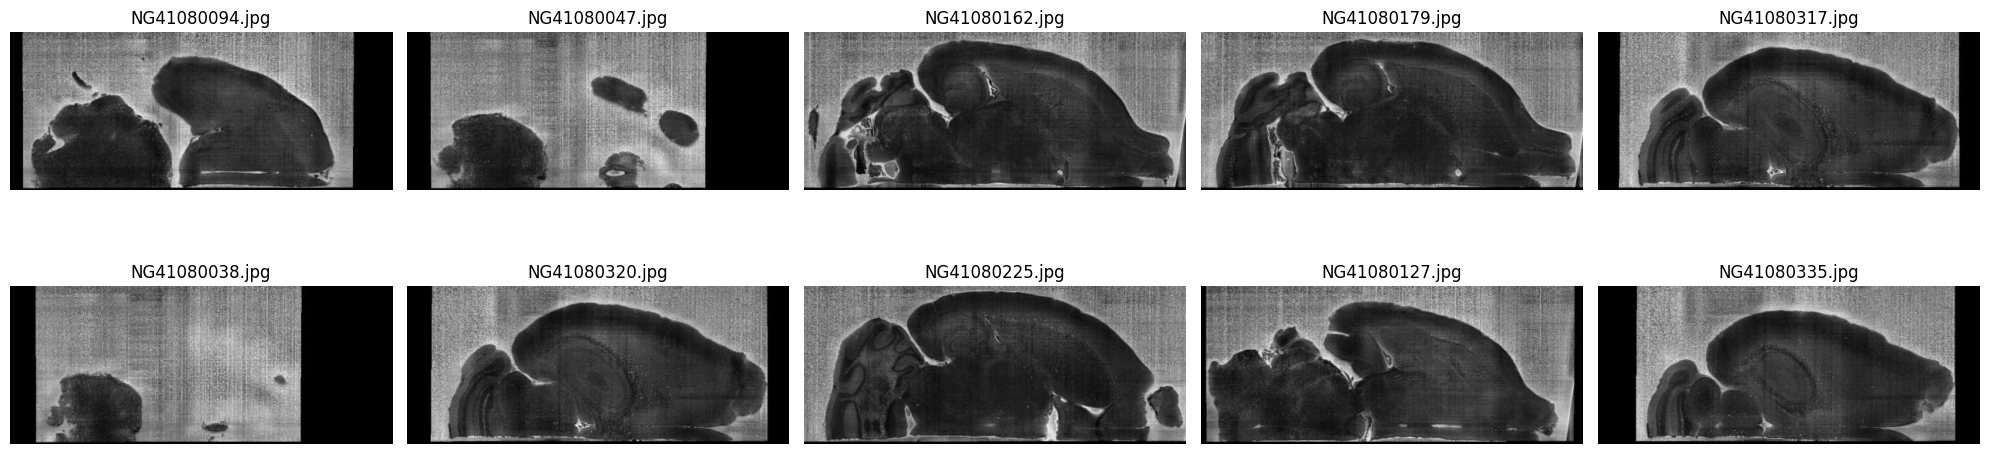

In [9]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the directory where your images are located
directory = '/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/2d/train'


# List all files in the directory, filter out non-image files or select specific image types, and sort them
all_files = sorted([f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Randomly select 10 images from the list of files
selected_images = random.sample(all_files, 10)

# Set up the plot with a grid of 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
axes = axes.flatten()

# Loop over selected images and plot each
for idx, img_name in enumerate(selected_images):
    img_path = os.path.join(directory, img_name)
    img = mpimg.imread(img_path)
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(img_name)

plt.tight_layout()
plt.show()


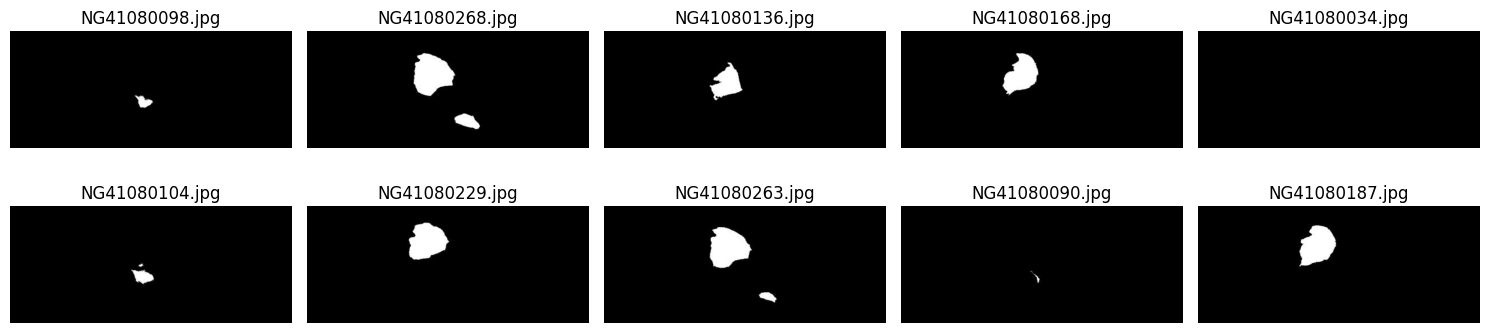

In [8]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the directory where your images are located
directory = '/Users/taiaburrahman/Desktop/hackUPC/iris-vector-search/dataset/2d/train/label'


# List all files in the directory, filter out non-image files or select specific image types, and sort them
all_files = sorted([f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Randomly select 10 images from the list of files
selected_images = random.sample(all_files, 10)

# Set up the plot with a grid of 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(15, 4))
axes = axes.flatten()

# Loop over selected images and plot each
for idx, img_name in enumerate(selected_images):
    img_path = os.path.join(directory, img_name)
    img = mpimg.imread(img_path)
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(img_name)

plt.tight_layout()
plt.show()
